## Making Inferences: Do AirBnB's _cause_ Rents to Increase?

### Time Series in `pandas`

In [1]:
import pandas as pd
import matplotlib as plt

# draw plots in notebook
%matplotlib inline

In [2]:
# make plots SVG (higher quality)
%config InlineBackend.figure_format = 'svg'

In [3]:
# more time/compute intensive to parse dates. but we know we definitely have/need them
df = pd.read_csv('data/sf_listings.csv', parse_dates=['last_review'], infer_datetime_format=True)
df_reviews = pd.read_csv('data/reviews.csv', parse_dates=['date'], infer_datetime_format=True)

In [4]:
df_reviews.date[0]

Timestamp('2014-02-27 00:00:00')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1162609,Lovely One Bedroom Apartment,6368122,Taylor,NaN,Seacliff,37.785217,-122.488655,Entire home/apt,350,4,8,2015-09-17,0.28,1,90
1,6032828,Historic Seacliff Home,30384615,Patricia,NaN,Seacliff,37.783658,-122.489398,Entire home/apt,300,1,0,NaT,NaN,1,173
2,6938818,Best Secret in Town,36381578,Harris,NaN,Seacliff,37.781505,-122.504754,Private room,119,1,10,2015-10-08,2.33,1,341
3,8087607,Single Room Beautiful Beach Condo,3264449,Keith,NaN,Seacliff,37.775318,-122.511621,Private room,79,1,0,NaT,NaN,1,40
4,4781448,3 Bd 2.5 Ba Full Flat Condo w Views,13112558,Pam,NaN,Seacliff,37.781797,-122.492492,Entire home/apt,695,2,1,2015-08-11,0.36,1,23


In [6]:
# display general diagnostic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 16 columns):
id                                7029 non-null int64
name                              7029 non-null object
host_id                           7029 non-null int64
host_name                         6504 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     7029 non-null object
latitude                          7029 non-null float64
longitude                         7029 non-null float64
room_type                         7029 non-null object
price                             7029 non-null int64
minimum_nights                    7029 non-null int64
number_of_reviews                 7029 non-null int64
last_review                       5698 non-null datetime64[ns]
reviews_per_month                 5698 non-null float64
calculated_host_listings_count    7029 non-null int64
availability_365                  7029 non-null int64
dtypes: dat

In [7]:
df_reviews.head()

,listing_id,date
0,1994427,2014-02-27
1,1994427,2015-10-07
2,1994427,2015-10-12
3,1994427,2015-10-17
4,1994427,2015-10-26


In [8]:
# index DataFrame on listing_id in order to join datasets
reindexed_df = df_reviews.set_index('listing_id')
reindexed_df.head()

,date
listing_id,
1994427,2014-02-27
1994427,2015-10-07
1994427,2015-10-12
1994427,2015-10-17
1994427,2015-10-26


In [9]:
# remember the original id in a column to group on
df['listing_id'] = df['id']
df_listing = df.set_index('id')
df_listing.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id
id,,,,,,,,,,,,,,,,
1162609,Lovely One Bedroom Apartment,6368122,Taylor,NaN,Seacliff,37.785217,-122.488655,Entire home/apt,350,4,8,2015-09-17,0.28,1,90,1162609
6032828,Historic Seacliff Home,30384615,Patricia,NaN,Seacliff,37.783658,-122.489398,Entire home/apt,300,1,0,NaT,NaN,1,173,6032828
6938818,Best Secret in Town,36381578,Harris,NaN,Seacliff,37.781505,-122.504754,Private room,119,1,10,2015-10-08,2.33,1,341,6938818
8087607,Single Room Beautiful Beach Condo,3264449,Keith,NaN,Seacliff,37.775318,-122.511621,Private room,79,1,0,NaT,NaN,1,40,8087607
4781448,3 Bd 2.5 Ba Full Flat Condo w Views,13112558,Pam,NaN,Seacliff,37.781797,-122.492492,Entire home/apt,695,2,1,2015-08-11,0.36,1,23,4781448


## Star Schema (facts vs. dimensions)

![Star Schema](https://upload.wikimedia.org/wikipedia/en/f/fe/Star-schema-example.png)

In our case, the individual review _events_ are the facts and listings themselves are the dimensions.


In [10]:
# join the listing information with the review information
review_timeseries = df_listing.join(reindexed_df)

print review_timeseries.columns
review_timeseries.head()

Index([u'name', u'host_id', u'host_name', u'neighbourhood_group',
       u'neighbourhood', u'latitude', u'longitude', u'room_type', u'price',
       u'minimum_nights', u'number_of_reviews', u'last_review',
       u'reviews_per_month', u'calculated_host_listings_count',
       u'availability_365', u'listing_id', u'date'],
      dtype='object')


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,date
958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.433856,Entire home/apt,170,2,38,2015-08-31,0.5,1,314,958,2009-07-23
958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.433856,Entire home/apt,170,2,38,2015-08-31,0.5,1,314,958,2009-08-03
958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.433856,Entire home/apt,170,2,38,2015-08-31,0.5,1,314,958,2009-09-27
958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.433856,Entire home/apt,170,2,38,2015-08-31,0.5,1,314,958,2009-11-05
958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.433856,Entire home/apt,170,2,38,2015-08-31,0.5,1,314,958,2010-02-13


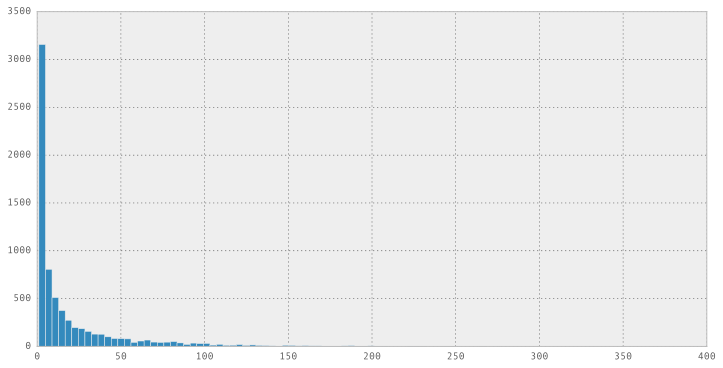

In [11]:
# nothing new/interesting here...
review_timeseries.groupby('listing_id').count()['name'].hist(bins=100, figsize=(12,6));

In [12]:
# causes python to crash, lets see if there is a better way
# review_timeseries.groupby(['neighbourhood','date']).count()

In [13]:
# lets try a pivot table...
reviews_over_time = pd.crosstab(review_timeseries.date, review_timeseries.neighbourhood)
reviews_over_time.head()

neighbourhood,Bayview,Bernal Heights,Castro/Upper Market,Chinatown,Crocker Amazon,Diamond Heights,Downtown/Civic Center,Excelsior,Financial District,Glen Park,...,Presidio,Presidio Heights,Russian Hill,Seacliff,South of Market,Treasure Island/YBI,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
date,,,,,,,,,,,,,,,,,,,,,
2009-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-05-03,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-05-23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-06-12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-07-15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


![](http://i0.kym-cdn.com/photos/images/facebook/000/011/296/success_baby.jpg)

In [14]:
# let's look at some particular neighborhoods
neighborhoods = df.neighbourhood.unique()
print neighborhoods

['Seacliff' 'Haight Ashbury' 'Outer Mission' 'Downtown/Civic Center'
 'Diamond Heights' 'Lakeshore' 'Russian Hill' 'Noe Valley' 'Inner Sunset'
 'Treasure Island/YBI' 'Outer Richmond' 'Crocker Amazon' 'Excelsior'
 'Parkside' 'Financial District' 'Ocean View' 'Mission'
 'West of Twin Peaks' 'Inner Richmond' 'Marina' 'Bayview'
 'Visitacion Valley' 'Pacific Heights' 'Presidio Heights' 'South of Market'
 'Glen Park' 'Potrero Hill' 'Castro/Upper Market' 'Twin Peaks'
 'Bernal Heights' 'Chinatown' 'North Beach' 'Presidio' 'Nob Hill'
 'Outer Sunset' 'Western Addition' 'Golden Gate Park']


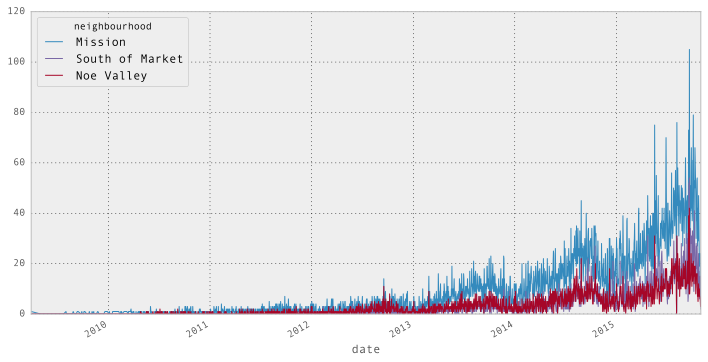

In [16]:
# a little noisy
reviews_over_time[['Mission', 'South of Market', 'Noe Valley']].plot(figsize=(12,6))

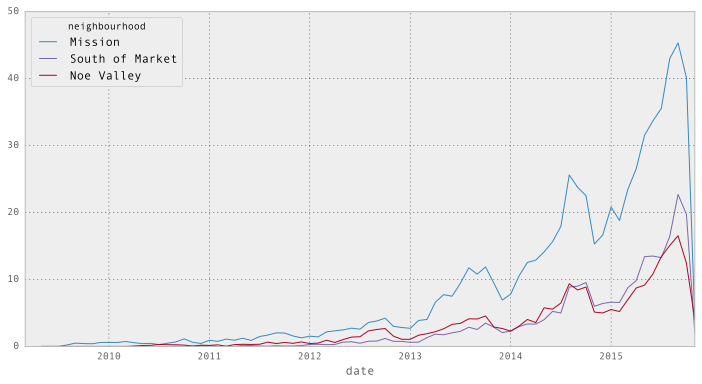

In [17]:
# smooth by resampling by month
reviews_over_time.resample('M').mean()[['Mission', 'South of Market', 'Noe Valley']].plot(figsize=(12,6))

[Pandas Resample String convention](http://stackoverflow.com/a/17001474/6099358)

#### Interesting things of note:

* Each neighborhood has an activity spike in Fall 2014 and Summer 2015.
* Likely a late summer vacation surge (since that is when SF has nicest weather :)
    * It is periodic and the magnitude of the increase is itself increasing (good news for AirBnB!)...

## Exercise 1: Spotting Trends

Using the following functions, find which columns correlate with increased activity (# of reviews and reviews per month):
* `pandas` [correlation function](http://pandas.pydata.org/pandas-docs/stable/computation.html#correlation)
* Seaborn [Heatmaps](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html)

In [ ]:
# Exercise 1 Solution

### Correlation vs. Regression

> Actually pretty nearly similar mathematically...

At least inferentially: http://stats.stackexchange.com/questions/2125/whats-the-difference-between-correlation-and-simple-linear-regression

## Introduction to Machine Learning

> slideshow!

## Model Evaluation: Finding Under (or over) valued Listings

In [18]:
from sklearn import linear_model

In [31]:
features = df[['host_name', 'neighbourhood', 'room_type', 'minimum_nights','number_of_reviews', \
               'calculated_host_listings_count', 'availability_365']]
labels = df['price']

In [20]:
# no price!
features.head()

,host_name,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Taylor,Seacliff,Entire home/apt,4,8,1,90
1,Patricia,Seacliff,Entire home/apt,1,0,1,173
2,Harris,Seacliff,Private room,1,10,1,341
3,Keith,Seacliff,Private room,1,0,1,40
4,Pam,Seacliff,Entire home/apt,2,1,1,23


In [21]:
# Categorical -> One Hot Encoding
# http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features
dummies = pd.get_dummies(features)

# sklearn likes matrices
feature_matrix = dummies.as_matrix()

In [22]:
labels.as_matrix()

array([ 350,  300,  119, ...,   80, 2500,   72])

In [23]:
feature_matrix

array([[  4.,   8.,   1., ...,   1.,   0.,   0.],
       [  1.,   0.,   1., ...,   1.,   0.,   0.],
       [  1.,  10.,   1., ...,   0.,   1.,   0.],
       ..., 
       [  1.,   0.,   1., ...,   0.,   1.,   0.],
       [  1.,   0.,   1., ...,   1.,   0.,   0.],
       [  2.,   3.,   2., ...,   1.,   0.,   0.]])

In [24]:
# Initialize and Fit sklearn model

model = linear_model.LinearRegression()
clf = model.fit(feature_matrix, labels.as_matrix()) 

In [25]:
# How well did we do?
clf.score(feature_matrix, labels.as_matrix())

0.48736577956996263

In [27]:
print "There are {0} features...".format(len(clf.coef_))
clf.coef_

There are 2442 features...


array([  -0.55304055,   -0.89869096,   -2.23493976, ...,  126.97532449,
        -28.92829922,  -98.04702526])

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/1024px-Coefficient_of_Determination.svg.png)
R-squared: [https://en.wikipedia.org/wiki/Coefficient_of_determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [32]:
# Remove the name column, we are probably overfitting...
no_name = features.copy()
no_name.pop('host_name')
no_names_feature_m = pd.get_dummies(no_name).as_matrix()

In [33]:
model = linear_model.LinearRegression(normalize=True)
clf = model.fit(no_names_feature_m, labels.as_matrix()) 

In [34]:
# Turns out the name feature is highly predictive...
# but not very useful: https://www.kaggle.com/wiki/Leakage
clf.score(no_names_feature_m, labels.as_matrix())

0.08339169072234609

In [35]:
len(clf.coef_)

44

In [37]:
# We need more and better features
df2 = pd.read_csv('data/listings_full.csv')
df2.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'thumbnail_url',
       u'medium_url', u'picture_url', u'xl_picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u

In [38]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1162609,https://www.airbnb.com/rooms/1162609,20151101181058,2015-11-02,Lovely One Bedroom Apartment,This is a big well designed space. Our neighbo...,This is a great one bedroom apartment. It is a...,This is a big well designed space. Our neighbo...,none,NaN,...,9.0,t,NaN,SAN FRANCISCO,f,strict,f,f,1,0.28
1,6032828,https://www.airbnb.com/rooms/6032828,20151101181058,2015-11-01,Historic Seacliff Home,Beautiful charmng multi- bedroom home in prest...,NaN,Beautiful charmng multi- bedroom home in prest...,none,NaN,...,NaN,t,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN
2,6938818,https://www.airbnb.com/rooms/6938818,20151101181058,2015-11-02,Best Secret in Town,Convenience is the key for your travel. Walkin...,The room is spacious and it is on the top leve...,Convenience is the key for your travel. Walkin...,none,It is in the city and close to everything. Par...,...,9.0,t,S. F. Short-Term Residential Rental Registrati...,SAN FRANCISCO,f,strict,f,f,1,2.33
3,8087607,https://www.airbnb.com/rooms/8087607,20151101181058,2015-11-02,Single Room Beautiful Beach Condo,"When I travel, my quiet beach side condo makes...",NaN,"When I travel, my quiet beach side condo makes...",none,NaN,...,NaN,t,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN
4,4781448,https://www.airbnb.com/rooms/4781448,20151101181058,2015-11-02,3 Bd 2.5 Ba Full Flat Condo w Views,Our family-friendly condo is located in San Fr...,"Open concept living, dining area has great cit...",Our family-friendly condo is located in San Fr...,none,We are located across the street from Lincoln ...,...,10.0,t,NaN,SAN FRANCISCO,t,strict,f,f,1,0.36


In [39]:
# get a snapshot of some of the columns in the center of the matrix
df2.iloc[1:5, 40:60]

,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price
1,94121.0,San Francisco,"San Francisco, CA",US,United States,37.783658,-122.489398,t,House,Entire home/apt,6,2.0,4.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$300.00,NaN,NaN
2,94121.0,San Francisco,"San Francisco, CA",US,United States,37.781505,-122.504754,t,House,Private room,2,1.0,1.0,1.0,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,$119.00,$700.00,NaN
3,94121.0,San Francisco,"San Francisco, CA",US,United States,37.775318,-122.511621,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$79.00,NaN,NaN
4,94121.0,San Francisco,"San Francisco, CA",US,United States,37.781797,-122.492492,t,Apartment,Entire home/apt,8,2.5,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$695.00,NaN,NaN


In [40]:
# optimistically lets just use a few key features to start. Remember Occam's razor..
select_features = df2[['host_has_profile_pic' ,'host_identity_verified', 'host_listings_count','host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'transit', 'neighbourhood_cleansed','is_location_exact', 'property_type', 'room_type', 'accommodates','bathrooms','bedrooms','beds']]

In [41]:
select_features.head()

,host_has_profile_pic,host_identity_verified,host_listings_count,host_response_time,host_acceptance_rate,host_is_superhost,transit,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds
0,t,t,1.0,within an hour,100%,f,NaN,Seacliff,t,Apartment,Entire home/apt,2,1.0,1.0,1.0
1,t,f,1.0,NaN,NaN,f,NaN,Seacliff,t,House,Entire home/apt,6,2.0,4.0,2.0
2,t,t,1.0,within a few hours,75%,f,"If you are on budget, the public transportatio...",Seacliff,t,House,Private room,2,1.0,1.0,1.0
3,t,t,1.0,within an hour,0%,f,NaN,Seacliff,t,Apartment,Private room,2,1.0,1.0,1.0
4,t,t,2.0,within a few hours,100%,f,Easy bus access to the entire city with 3 bus ...,Seacliff,t,Apartment,Entire home/apt,8,2.5,3.0,4.0


In [43]:
# moar feature engineering. fill in missing data since it wil break our model
select_features = select_features.fillna({'host_response_time': 'NA', 'host_acceptance_rate': '-1%'})
select_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 15 columns):
host_has_profile_pic      7028 non-null object
host_identity_verified    7028 non-null object
host_listings_count       7028 non-null float64
host_response_time        7029 non-null object
host_acceptance_rate      7029 non-null object
host_is_superhost         7028 non-null object
transit                   4571 non-null object
neighbourhood_cleansed    7029 non-null object
is_location_exact         7029 non-null object
property_type             7024 non-null object
room_type                 7029 non-null object
accommodates              7029 non-null int64
bathrooms                 6974 non-null float64
bedrooms                  7020 non-null float64
beds                      7017 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 823.8+ KB


In [44]:
# convert the percentage as a string into a float
select_features.host_acceptance_rate = select_features.host_acceptance_rate.str.strip('%').astype(float) / 100 

In [45]:
# Binarize transit column... the listing is either near transit or it isn't
select_features.transit = select_features.transit.isnull()

In [46]:
select_features.transit

0        True
1        True
2       False
3        True
4       False
5       False
6       False
7       False
8       False
9       False
10       True
11      False
12       True
13      False
14      False
15      False
16       True
17       True
18      False
19       True
20       True
21      False
22      False
23       True
24       True
25       True
26      False
27      False
28       True
29      False
        ...  
6999    False
7000    False
7001    False
7002    False
7003    False
7004     True
7005    False
7006    False
7007    False
7008    False
7009    False
7010    False
7011    False
7012    False
7013    False
7014    False
7015    False
7016    False
7017    False
7018     True
7019     True
7020    False
7021    False
7022    False
7023    False
7024    False
7025    False
7026     True
7027     True
7028    False
Name: transit, dtype: bool

In [47]:
# One last fill incase we missed any nulls
dummies = pd.get_dummies(select_features).fillna(0)
feature_matrix = dummies.as_matrix()

In [48]:
# Price as a currency string -> price as a float
labels = df2.price.str.strip('$').str.replace(',', '').astype(float)

In [49]:
# initialize model again
model = linear_model.LinearRegression(normalize=True)
clf = model.fit(feature_matrix, labels) 

In [50]:
# much better!
clf.score(feature_matrix, labels)

0.2237815899681127

In [52]:
# a sweet spot in between over and under fitting
len(clf.coef_)

79

## Making Predictions: How should I price my Listing?!?

In [53]:
# Predict what we should price listing #1000 at given its features
clf.predict(feature_matrix[1100])

array([ 479.5])

In [55]:
# Looks like it is overpriced...
df2.iloc[1100].price

'$550.00'

In [56]:
# And it shows... there are only 2 reviews per month
df2.iloc[1100]

id                                                                            8700433
listing_url                                      https://www.airbnb.com/rooms/8700433
scrape_id                                                              20151101181058
last_scraped                                                               2015-11-02
name                                              Modern Victorian Home in Noe Valley
summary                             This comfortable and stylish Victorian home ha...
space                               Our rental space is the upper floor of our hom...
description                         This comfortable and stylish Victorian home ha...
experiences_offered                                                              none
neighborhood_overview               Noe Valley is a neighborhood located between t...
notes                               Two night minimum for Fri. and Sat. night unle...
transit                             It is a 10-15 minu

In [57]:
# Where the top listing have 10+ reviews per month
df2.sort_values('reviews_per_month', ascending=False).head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1271,6437264,https://www.airbnb.com/rooms/6437264,20151101181058,2015-11-02,Apartment + Loft overlooking SF,Unique sparsely furnished apartment in Noe val...,This is a very sparsely furnished main floor a...,Unique sparsely furnished apartment in Noe val...,none,You are in a very safe and desirable neighborh...,...,9.0,t,NaN,SAN FRANCISCO,f,flexible,f,f,1,11.52
1746,6629798,https://www.airbnb.com/rooms/6629798,20151101181058,2015-11-02,Room w/ private bath + free parking,One bedroom + private bathroom (which has a sk...,-Free Fast WiFi (105Mbps),One bedroom + private bathroom (which has a sk...,none,"is a safe, quiet and sunny neighborhood locate...",...,9.0,t,NaN,SAN FRANCISCO,t,moderate,f,f,1,11.25
3038,8118808,https://www.airbnb.com/rooms/8118808,20151101181058,2015-11-02,Master Suite in a beautiful house,It is one block walking to Forest Hill station...,NaN,It is one block walking to Forest Hill station...,none,NaN,...,9.0,t,NaN,SAN FRANCISCO,t,flexible,f,f,4,10.59
2966,7498479,https://www.airbnb.com/rooms/7498479,20151101181058,2015-11-01,Bluescreen Room: Mission SF,The Bluescreen Room is in the heart of the Mis...,The Bluescreen Room *was* a fully functional g...,The Bluescreen Room is in the heart of the Mis...,none,You are 1 block away from the Valencia Corrido...,...,9.0,t,STR-0000652,SAN FRANCISCO,f,flexible,f,f,2,10.42
1097,7129539,https://www.airbnb.com/rooms/7129539,20151101181058,2015-11-02,"Small, private Noe Valley apartment","This is a sparsely furnished, small, cozy, sec...",This completely private apartment suits up to ...,"This is a sparsely furnished, small, cozy, sec...",none,What's great about Noe Valley will speak for i...,...,9.0,t,NaN,SAN FRANCISCO,f,moderate,f,f,1,10.26


In [58]:
# Zip together our column names with our beta coefficients
coefficients = zip(dummies.columns, clf.coef_)

In [59]:
# Most significant
sorted(coefficients, key=lambda coef: coef[1], reverse=True)[:10]

[('room_type_Entire home/apt', 649630273189155.75),
 ('room_type_Private room', 649630273189092.38),
 ('room_type_Shared room', 649630273188997.0),
 ('host_is_superhost_t', 410651297312091.06),
 ('host_is_superhost_f', 410651297312067.56),
 ('is_location_exact_t', 380381413039120.19),
 ('is_location_exact_f', 380381413039088.94),
 ('property_type_Boat', 1661.2929738392058),
 ('property_type_Treehouse', 265.29860088537487),
 ('property_type_Yurt', 251.91169252271425)]

In [60]:
# Least significant
sorted(coefficients, key=lambda coef: coef[1])[:10]

[('neighbourhood_cleansed_Visitacion Valley', -1826685830349805.2),
 ('neighbourhood_cleansed_Crocker Amazon', -1826685830349795.8),
 ('neighbourhood_cleansed_Excelsior', -1826685830349777.8),
 ('neighbourhood_cleansed_Treasure Island/YBI', -1826685830349775.2),
 ('neighbourhood_cleansed_Parkside', -1826685830349771.0),
 ('neighbourhood_cleansed_Ocean View', -1826685830349769.0),
 ('neighbourhood_cleansed_Outer Mission', -1826685830349767.8),
 ('neighbourhood_cleansed_Bayview', -1826685830349767.5),
 ('neighbourhood_cleansed_Diamond Heights', -1826685830349763.5),
 ('neighbourhood_cleansed_Glen Park', -1826685830349759.2)]